Documents how the power curve for the kurt kinetic trainer was determined

In [76]:
%reset -f

In [77]:
from matplotlib import pyplot as plt
import numpy as np
from sympy import solve
from statistics import mean
import ggps

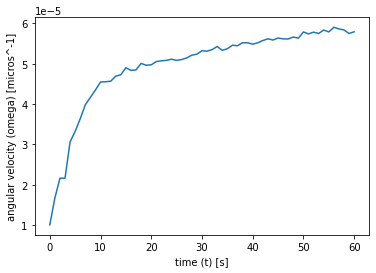

In [78]:
# get the rpm data
period_data = np.loadtxt('data2.txt')
omega = 1/period_data
# omega = np.insert(omega, 0, 0, axis=0)
plt.plot(omega);
plt.xlabel('time (t) [s]')
plt.ylabel('angular velocity (omega) [micros^-1]');

38


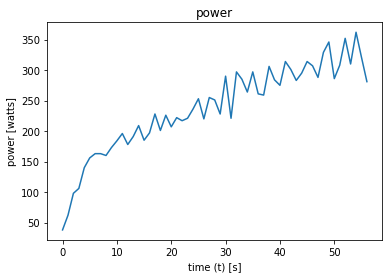

In [79]:
# get the power data
inFile = 'activity_4978232372.tcx'
handler = ggps.TcxHandler()
handler.parse(inFile)
trackpoints = handler.trackpoints
power_data = []
for t in trackpoints:
    try:
        power_data.append(int(t.values['watts']))
    except KeyError:
        pass
print(power_data[5])
# print(power_data[88])
plt.plot(power_data[5:]);
plt.title('power')
plt.xlabel('time (t) [s]')
plt.ylabel('power [watts]');

# Initial formula attempt (Incorrect)
The initial attempt failed due o sorting the data. <br> 
Even though it looked better sorted, it masked the oscelations in power data due to which phase of the pedal stroke the power was sampled at. This lead to a power formula that consistantly read much high than the three second average on the garmin. <br>
To correct for this, a second attempt has been made that takes the three second rolling average, without sorting and generates a formula 
based on that. 

178784649845.90945
-5601156.073298023
42.51283466603438


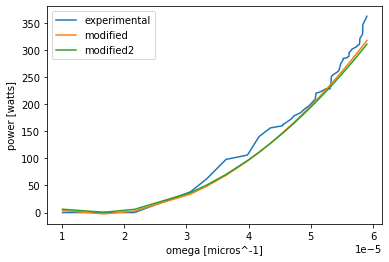

In [80]:
x = np.sort(omega)
y = np.sort(power_data[1:])
# print(len(x), len(y))

# solve for quadratic equation
coef_vec = np.polyfit(x, y, 2)
eqn_vals = []
for val in x:
    temp = 0
    for i, coef in enumerate(coef_vec[::-1]):
        temp += coef*(val**i)
    eqn_vals.append(temp)
for c in coef_vec:
    print(c)

# modified values
a = (178784649845.90945 - 5_000_000_000)
a2 = (178784649845.90945 - 12_000_000_000)
# a = 178784649845.90945

b = -5601156.073298023
b2 = -5601156.073298023 + 300_000

c = 42.51283466603438
mod_vals = []
mod_vals2 = []
for val in x:
    mod_vals.append(
        (a*(val**2)) + (b*val) + c
    )
    mod_vals2.append(
        (a2*(val**2)) + (b2*val) + c
    )

# plot
y2 = np.asarray(eqn_vals)
y3 = np.asarray(mod_vals)
y4 = np.asarray(mod_vals2)
plt.plot(x, y, label='experimental');
# plt.plot(x, y2, label='equation')
plt.plot(x, y3, label='modified')
plt.plot(x, y4, label='modified2')
plt.xlabel("omega [micros^-1]")
plt.ylabel("power [watts]")
plt.legend();

## ====== Incorrect ======
The initial values delivered from the data analysis were very close <br> 
however, after further testing it was determed that slightly modifying <br> 
the value of "a" made the power number match the values read on the <br>
garmin much more closely.<br><br>
The reason modification was necessary was most likely due to the "humps" <br>
in the raw data between 3e-5 and 5 e-5 <br>
## =======================

# Second formula attempt (Incorrect)

In [81]:
three_second_average = []
for i, _ in enumerate(power_data[:-2]):
    three_second_average.append(
        mean(power_data[i: i+3])
    )
three_second_average = np.asarray(three_second_average);

199844880469.07413
-7111362.674411774
58.65055109403046


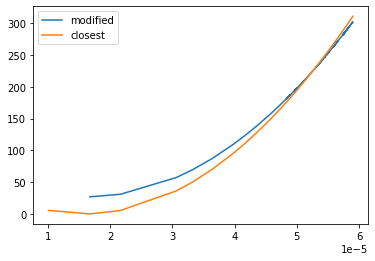

In [94]:
# plt.plot(
#     omega[1:], three_second_average, label="experimental 3s rolling avg"
# )

coef_vec = np.polyfit(omega[1:], three_second_average, 2)
eqn_vals = []
for val in omega[1:]:
    temp = 0
    for i, coef in enumerate(coef_vec[::-1]):
        temp += coef*(val**i)
    eqn_vals.append(temp)

mod_vals = []
a = 199_844_880_469.07413 - 48_000_000_000
b = -7_111_362.674411774 + 2_100_500
c = 58.65055109403046 + 10
for val in omega[1:]:
    mod_vals.append(
        (a*(val**2)) + (b*val) + c
    )

# plt.plot(omega[1:], eqn_vals, label="equation 3s rolling avg")
plt.plot(omega[1:], mod_vals, label="modified")
plt.plot(x, y4, label='closest')
plt.legend();

The second attempt at formulation also had to be modified. That being said through a process of trail and error, a formula that tracked very closely with the three second averge power reading from a garmin920 was able to be formulated. <br>
The coefficients for the quadratic equation used to correlate omega to three second average power are: <br>
$$ a = (199844880469.07413 - 48000000000) $$
$$ b = (-7111362.674411774 + 2100500) $$
$$ c = (58.65055109403046 + 10) $$
where the values summed to the a, b and c terms are the modifications necessary to make omega correlate to three second average power. 